<a href="https://colab.research.google.com/github/ishita48/Breast-Cancer-Diagnosis-ML-model/blob/main/loan_approval_prediction_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

SETUP AND DATA LOADING

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neural_network import MLPClassifier
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

In [2]:
df = pd.read_csv('train.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
# Load dataset (replace with your dataset path)
df = pd.read_csv('train.csv')

# Display first few rows and check data types
print(df.head())
print(df.info())

#Dataset Shape
df.shape

# Summary statistics
print(df.describe())

# Check for missing values
print(df.isnull().sum())



    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0   

DATA PREPROCESSING

In [4]:
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].median())
df.dropna(inplace=True)
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [5]:
df.shape

(542, 13)

 Exploratory Data Analysis (EDA)

Univariate Analysis: Analyzing individual columns.

Bivariate Analysis: Analyzing relationships between two variables.

Multivariate Analysis: Analyzing relationships between multiple variables.

Missing Values Analysis: Understanding the pattern of missing values.

Outliers Analysis: Detecting and understanding outlier



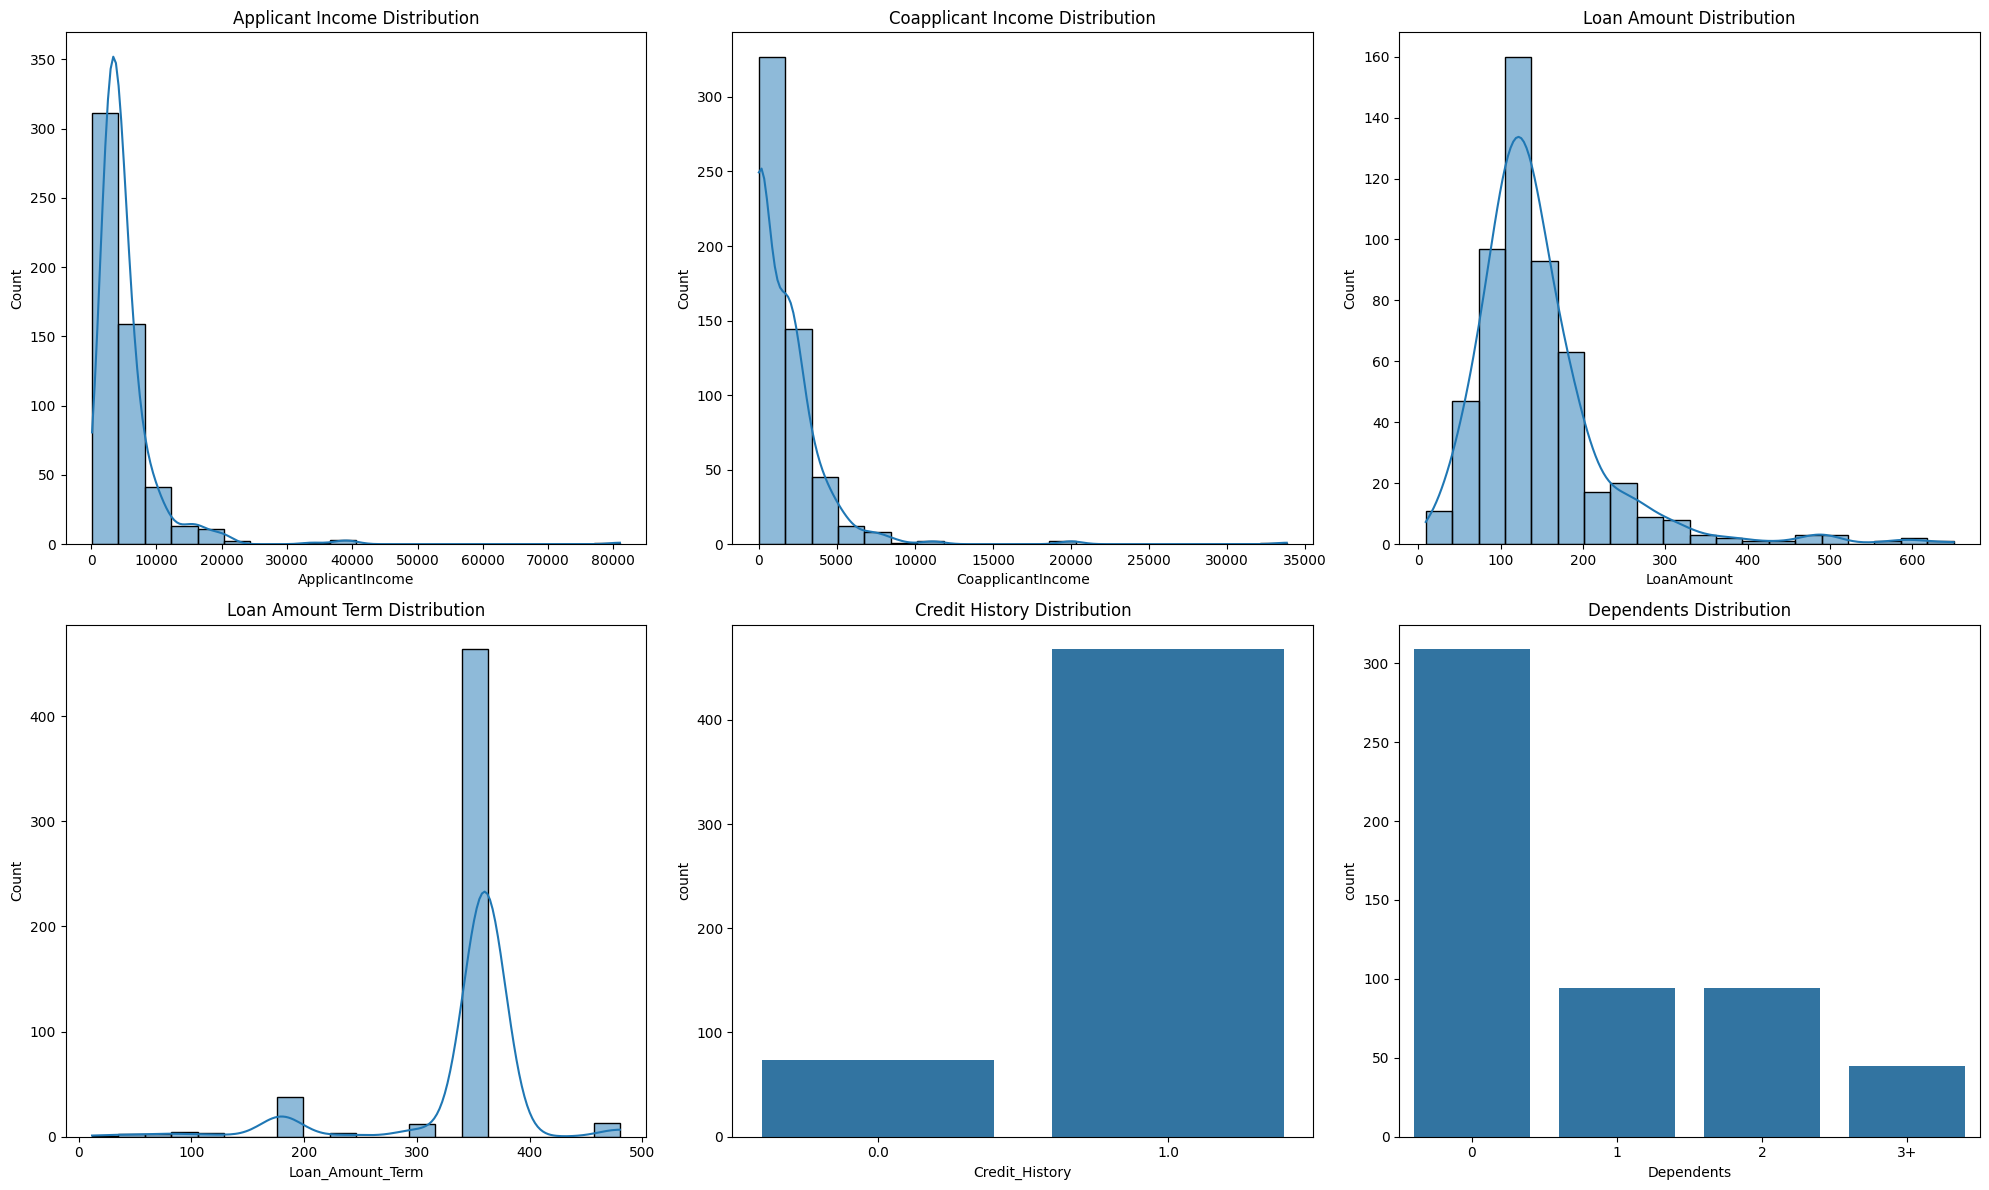

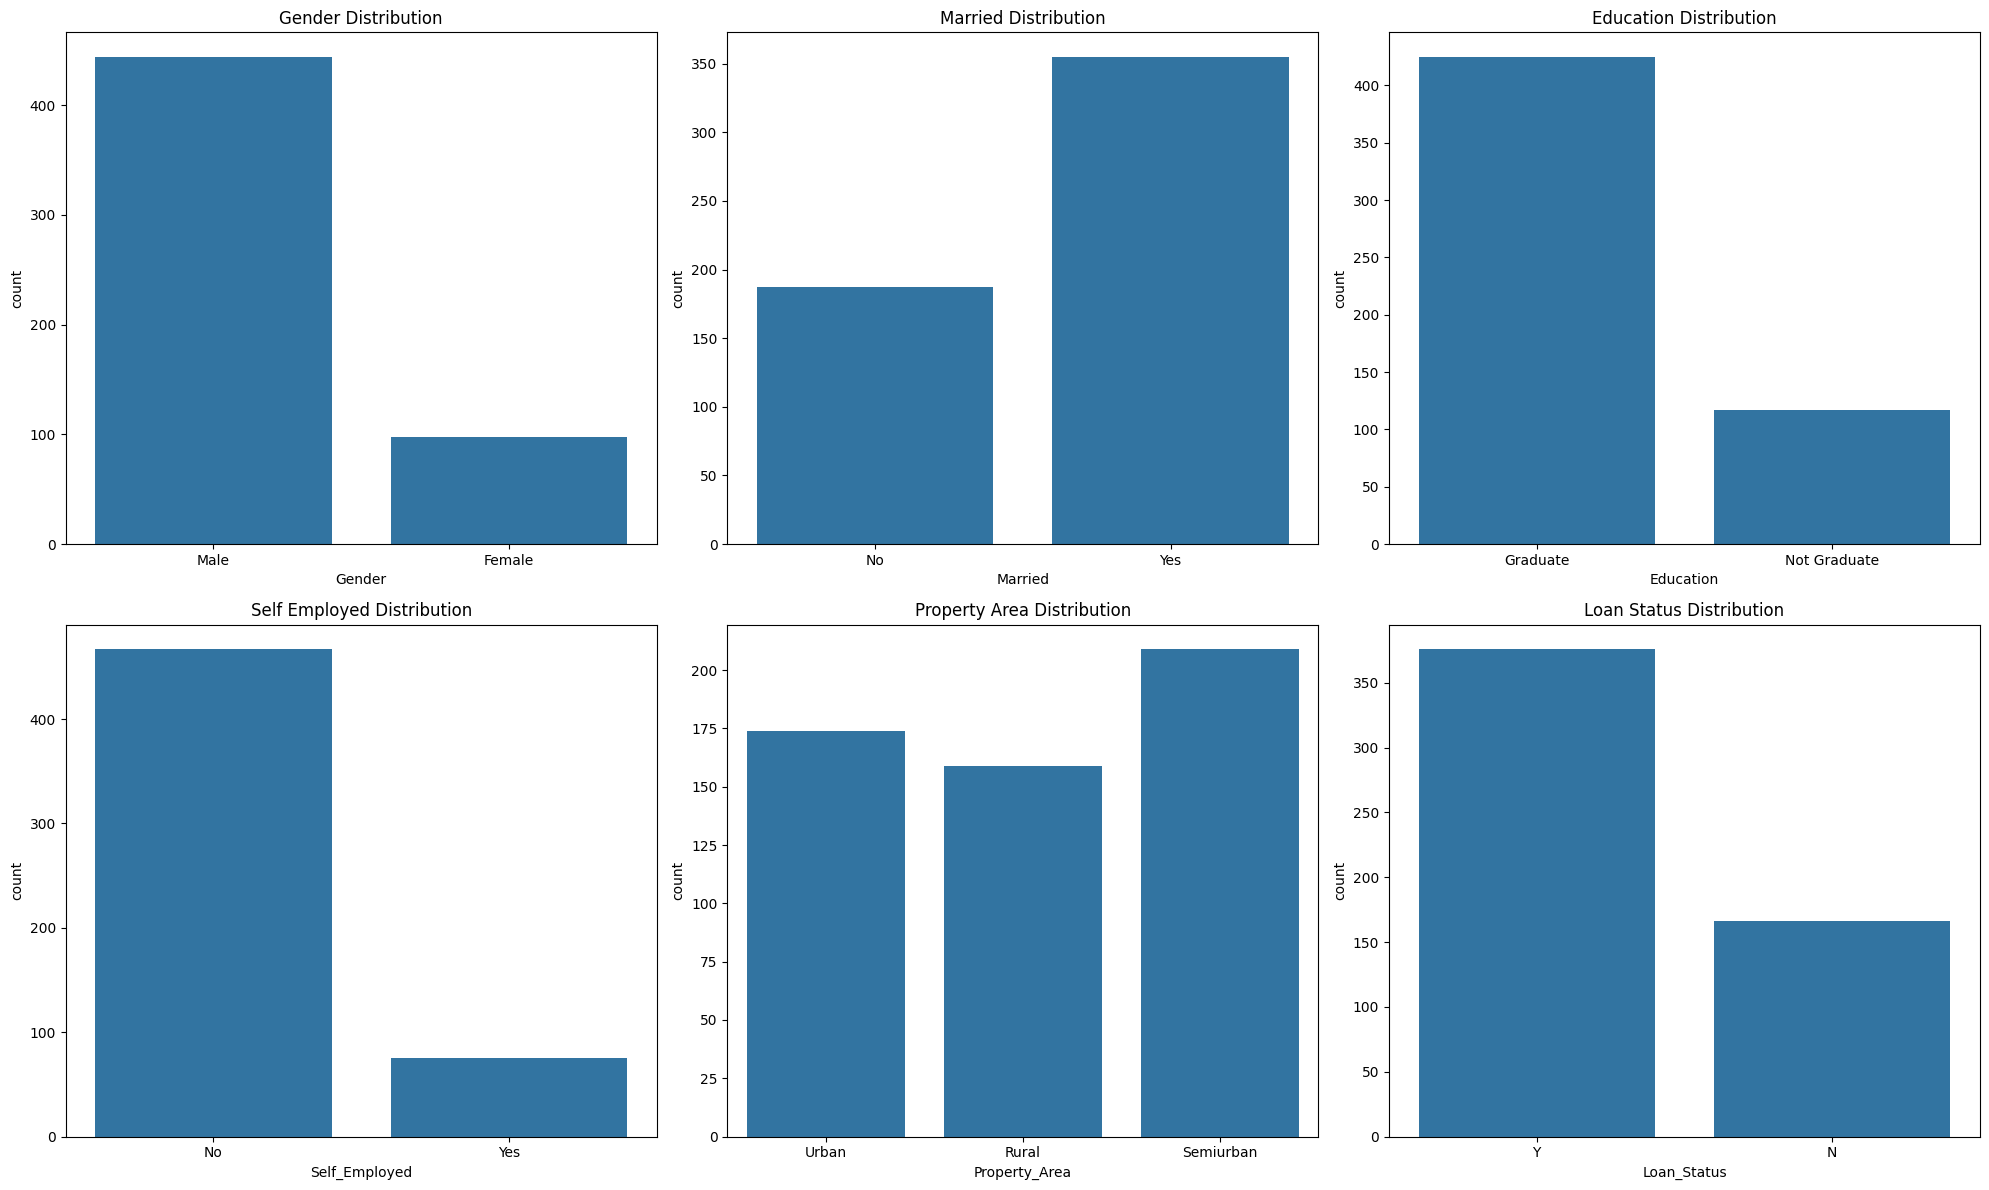

In [6]:
# Univariate Analysis - Distribution of numerical features
fig, ax = plt.subplots(2, 3, figsize=(20, 12))

sns.histplot(df['ApplicantIncome'], bins=20, kde=True, ax=ax[0, 0])
ax[0, 0].set_title('Applicant Income Distribution')

sns.histplot(df['CoapplicantIncome'], bins=20, kde=True, ax=ax[0, 1])
ax[0, 1].set_title('Coapplicant Income Distribution')

sns.histplot(df['LoanAmount'], bins=20, kde=True, ax=ax[0, 2])
ax[0, 2].set_title('Loan Amount Distribution')

sns.histplot(df['Loan_Amount_Term'], bins=20, kde=True, ax=ax[1, 0])
ax[1, 0].set_title('Loan Amount Term Distribution')

sns.countplot(x='Credit_History', data=df, ax=ax[1, 1])
ax[1, 1].set_title('Credit History Distribution')

sns.countplot(x='Dependents', data=df, ax=ax[1, 2])
ax[1, 2].set_title('Dependents Distribution')

plt.tight_layout()
plt.show()

# Univariate Analysis - Distribution of categorical features
fig, ax = plt.subplots(2, 3, figsize=(20, 12))

sns.countplot(x='Gender', data=df, ax=ax[0, 0])
ax[0, 0].set_title('Gender Distribution')

sns.countplot(x='Married', data=df, ax=ax[0, 1])
ax[0, 1].set_title('Married Distribution')

sns.countplot(x='Education', data=df, ax=ax[0, 2])
ax[0, 2].set_title('Education Distribution')

sns.countplot(x='Self_Employed', data=df, ax=ax[1, 0])
ax[1, 0].set_title('Self Employed Distribution')

sns.countplot(x='Property_Area', data=df, ax=ax[1, 1])
ax[1, 1].set_title('Property Area Distribution')

sns.countplot(x='Loan_Status', data=df, ax=ax[1, 2])
ax[1, 2].set_title('Loan Status Distribution')

plt.tight_layout()
plt.show()


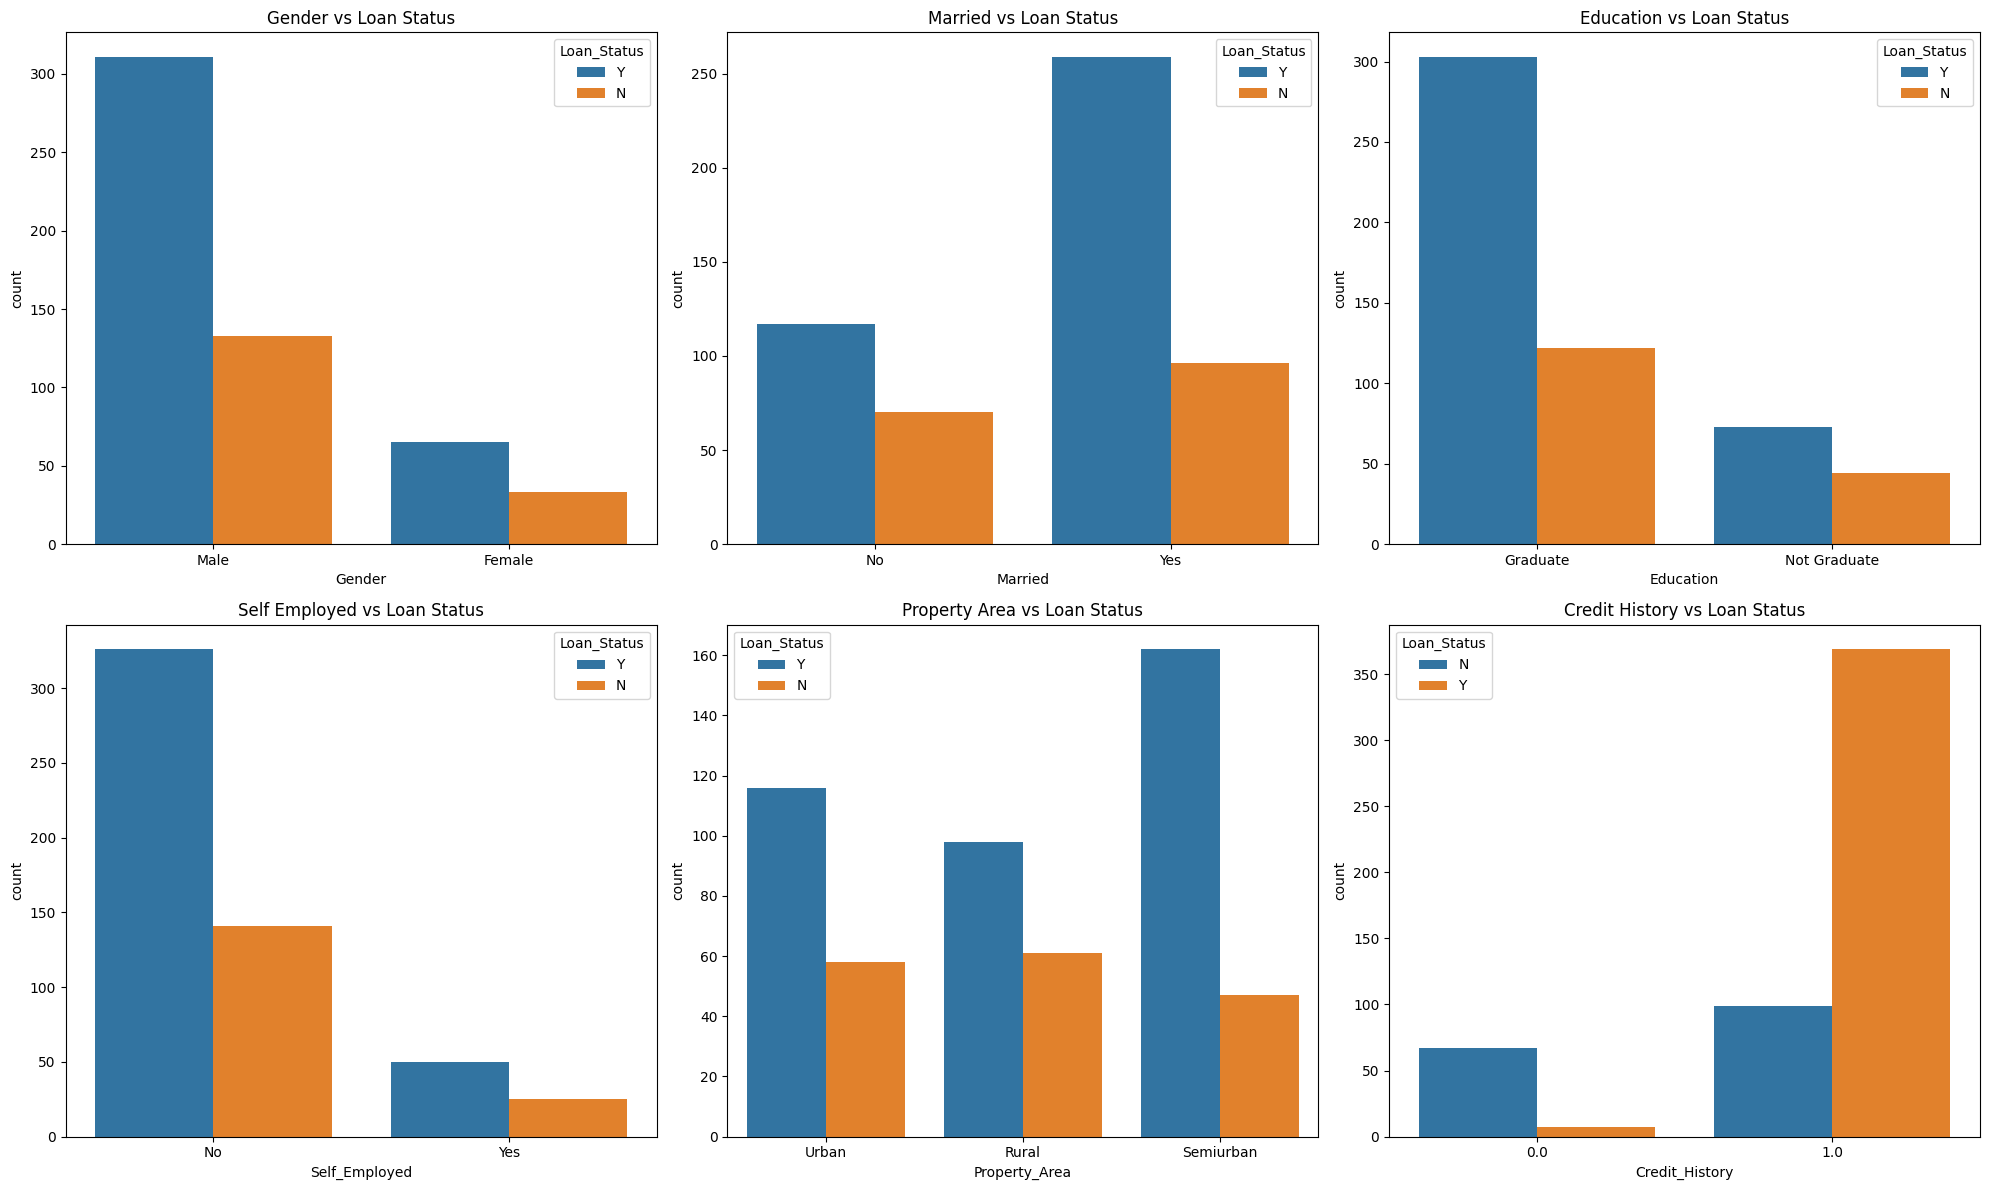

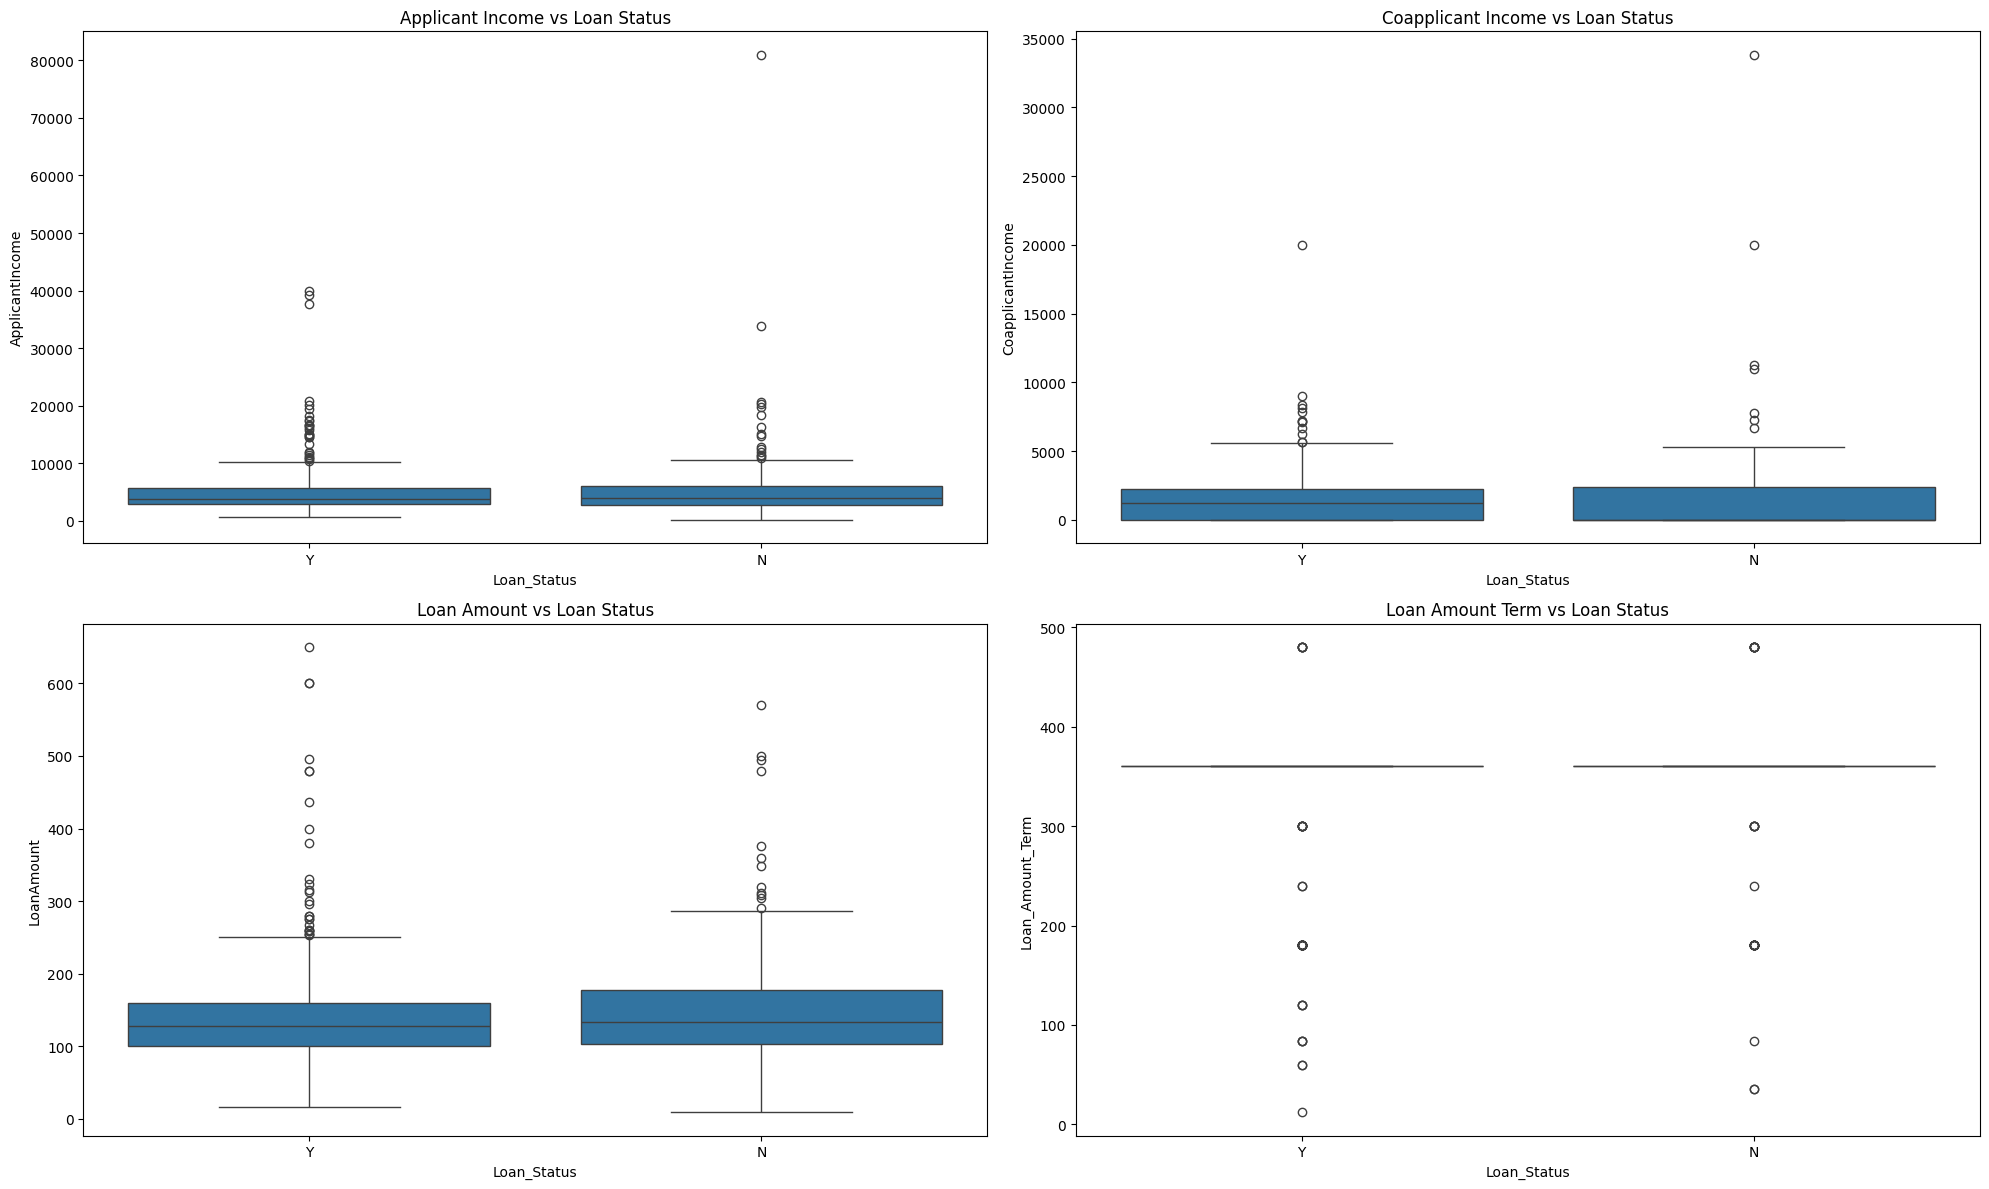

In [7]:
# Bivariate Analysis - Categorical vs Target Variable
fig, ax = plt.subplots(2, 3, figsize=(20, 12))

sns.countplot(x='Gender', hue='Loan_Status', data=df, ax=ax[0, 0])
ax[0, 0].set_title('Gender vs Loan Status')

sns.countplot(x='Married', hue='Loan_Status', data=df, ax=ax[0, 1])
ax[0, 1].set_title('Married vs Loan Status')

sns.countplot(x='Education', hue='Loan_Status', data=df, ax=ax[0, 2])
ax[0, 2].set_title('Education vs Loan Status')

sns.countplot(x='Self_Employed', hue='Loan_Status', data=df, ax=ax[1, 0])
ax[1, 0].set_title('Self Employed vs Loan Status')

sns.countplot(x='Property_Area', hue='Loan_Status', data=df, ax=ax[1, 1])
ax[1, 1].set_title('Property Area vs Loan Status')

sns.countplot(x='Credit_History', hue='Loan_Status', data=df, ax=ax[1, 2])
ax[1, 2].set_title('Credit History vs Loan Status')

plt.tight_layout()
plt.show()

# Bivariate Analysis - Numerical vs Target Variable
fig, ax = plt.subplots(2, 2, figsize=(20, 12))

sns.boxplot(x='Loan_Status', y='ApplicantIncome', data=df, ax=ax[0, 0])
ax[0, 0].set_title('Applicant Income vs Loan Status')

sns.boxplot(x='Loan_Status', y='CoapplicantIncome', data=df, ax=ax[0, 1])
ax[0, 1].set_title('Coapplicant Income vs Loan Status')

sns.boxplot(x='Loan_Status', y='LoanAmount', data=df, ax=ax[1, 0])
ax[1, 0].set_title('Loan Amount vs Loan Status')

sns.boxplot(x='Loan_Status', y='Loan_Amount_Term', data=df, ax=ax[1, 1])
ax[1, 1].set_title('Loan Amount Term vs Loan Status')

plt.tight_layout()
plt.show()


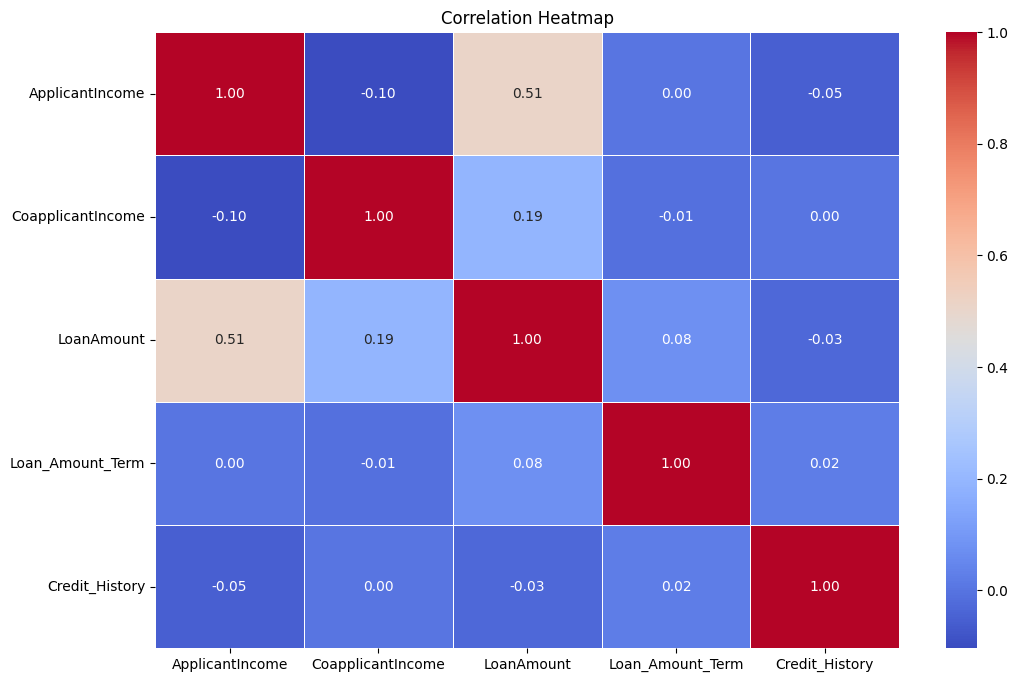

In [8]:
# Exclude non-numeric columns for correlation matrix
numeric_df = df.select_dtypes(include=[np.number])

# Multivariate Analysis - Correlation Heatmap
plt.figure(figsize=(12, 8))
corr = numeric_df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

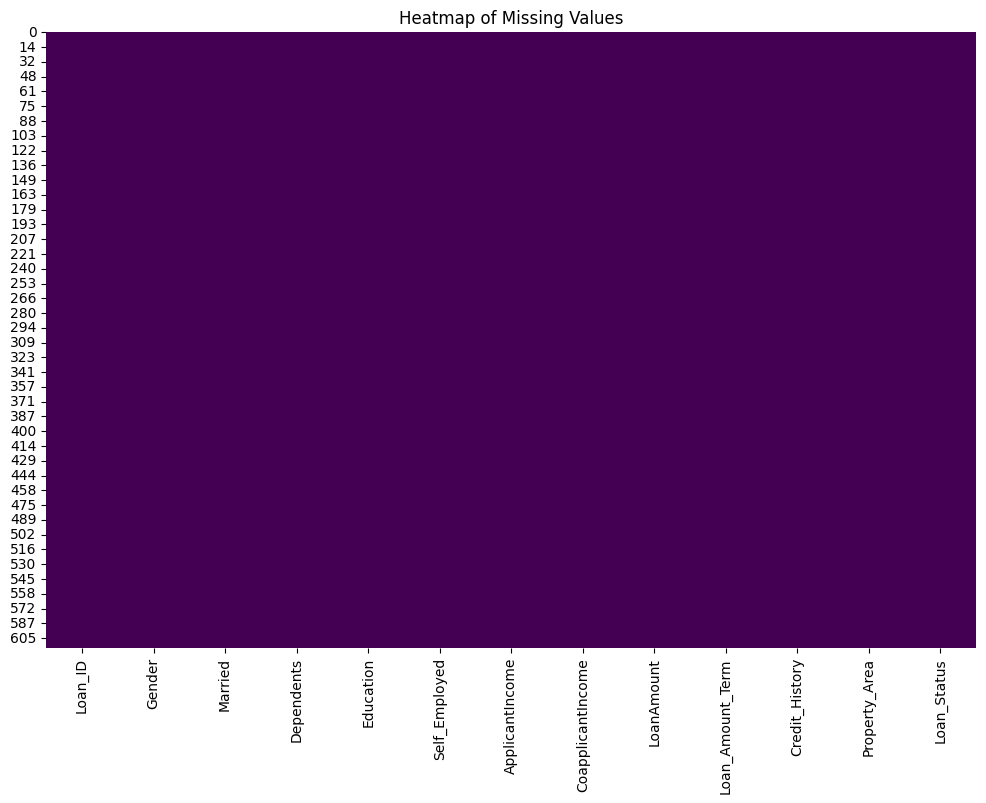

Series([], dtype: int64)


In [9]:
# Missing Values Analysis
plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap of Missing Values')
plt.show()

# Missing values count
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])


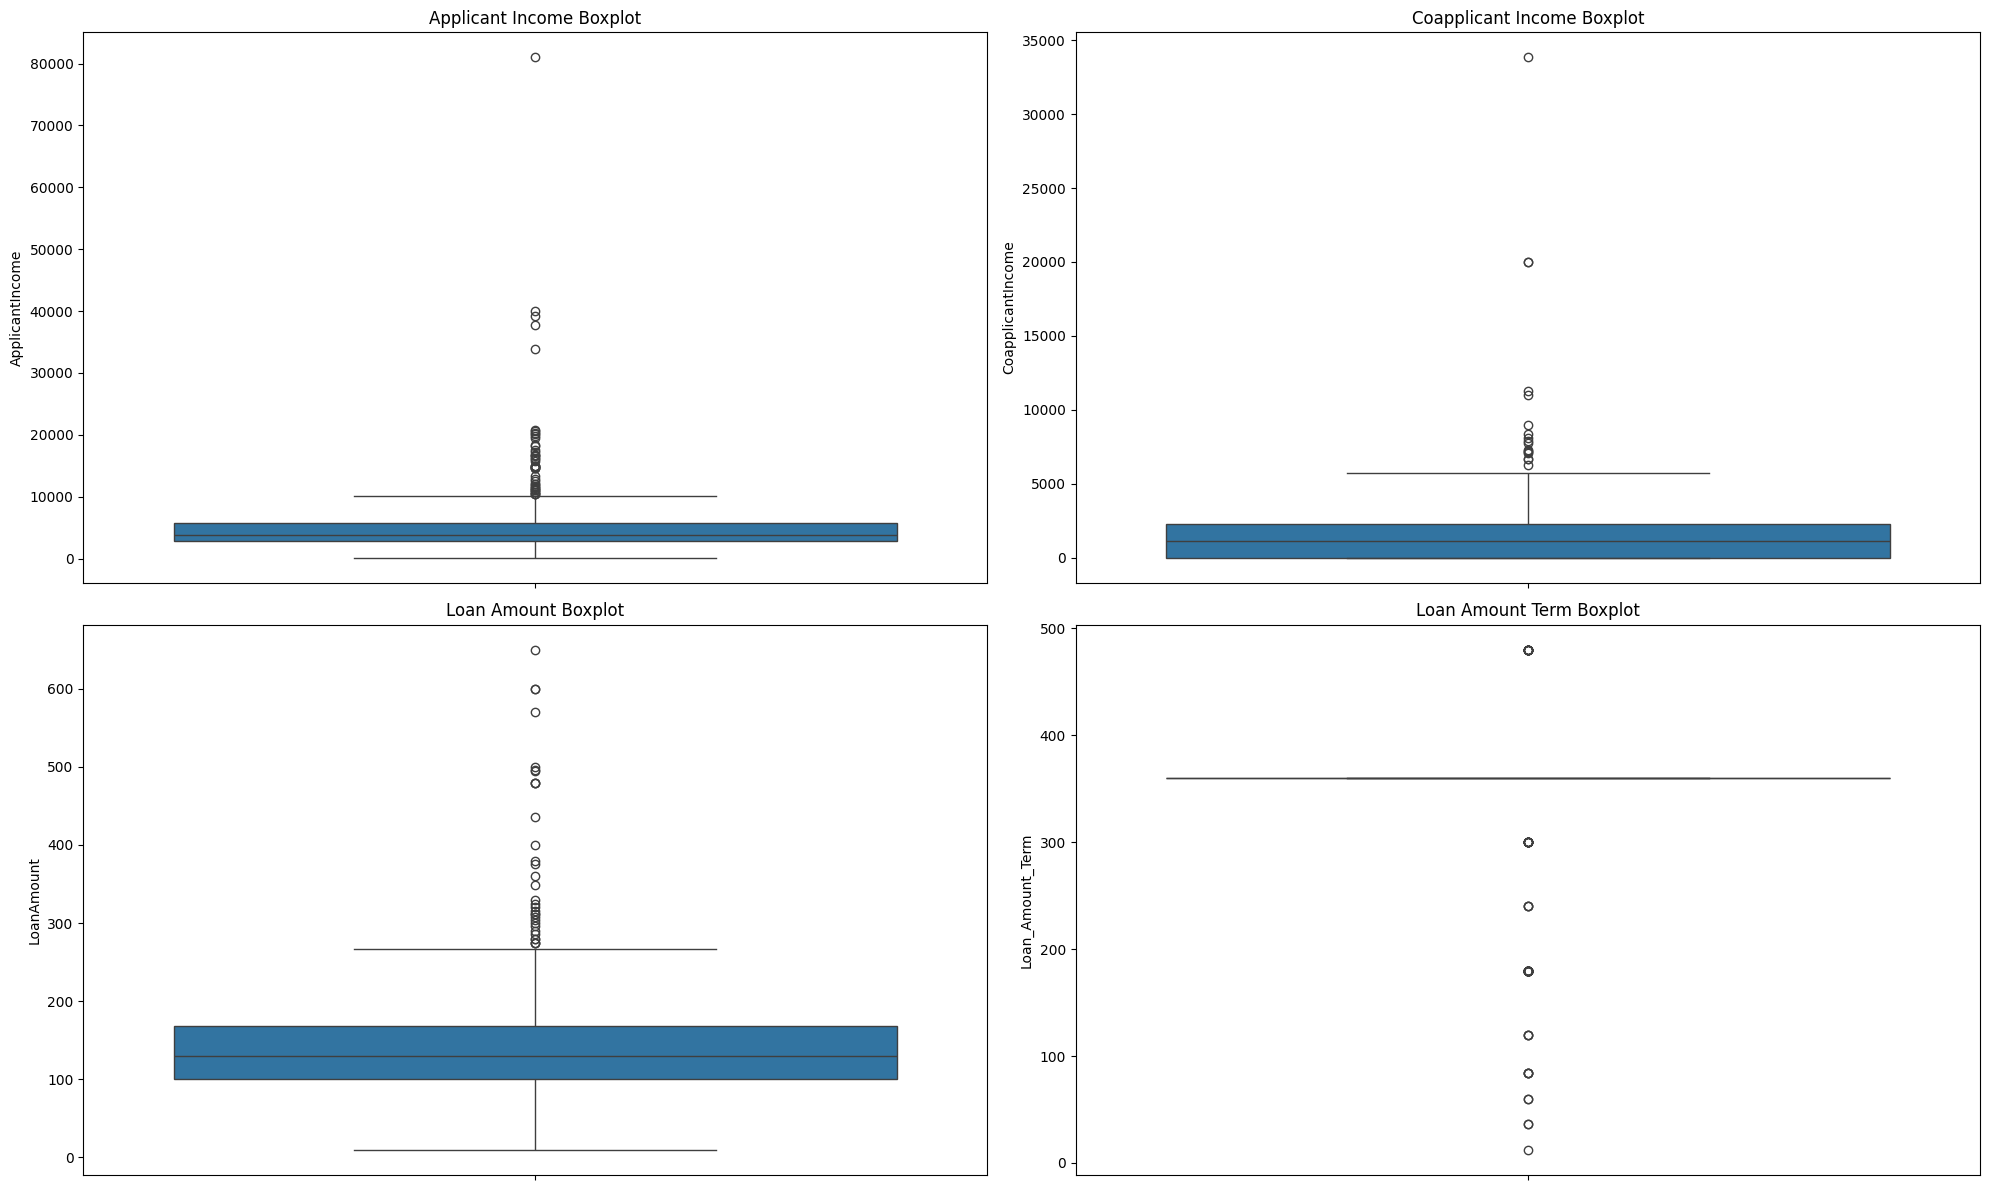

In [10]:
# Outliers Analysis - Boxplots
fig, ax = plt.subplots(2, 2, figsize=(20, 12))

sns.boxplot(df['ApplicantIncome'], ax=ax[0, 0])
ax[0, 0].set_title('Applicant Income Boxplot')

sns.boxplot(df['CoapplicantIncome'], ax=ax[0, 1])
ax[0, 1].set_title('Coapplicant Income Boxplot')

sns.boxplot(df['LoanAmount'], ax=ax[1, 0])
ax[1, 0].set_title('Loan Amount Boxplot')

sns.boxplot(df['Loan_Amount_Term'], ax=ax[1, 1])
ax[1, 1].set_title('Loan Amount Term Boxplot')

plt.tight_layout()
plt.show()


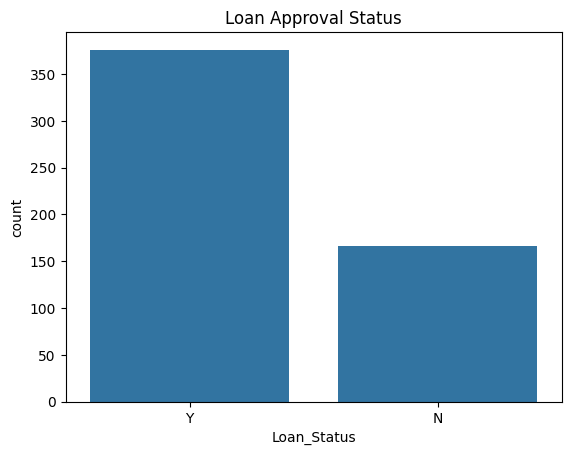

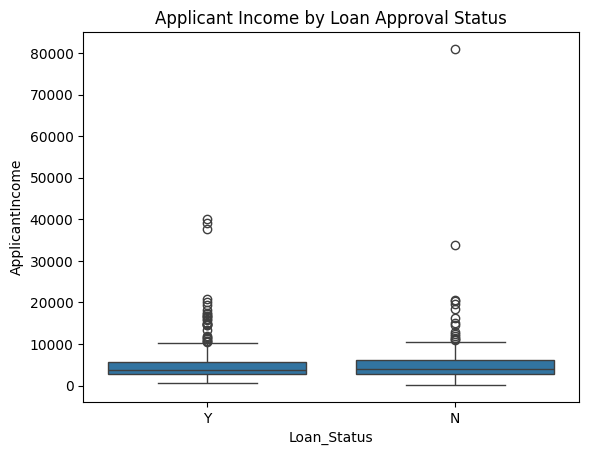

In [11]:
# Visualizations
sns.countplot(x='Loan_Status', data=df)
plt.title('Loan Approval Status')
plt.show()

sns.boxplot(x='Loan_Status', y='ApplicantIncome', data=df)
plt.title('Applicant Income by Loan Approval Status')
plt.show()


In [12]:
df['Loan_Status'].replace('Y',1,inplace=True)
df['Loan_Status'].replace('N',0,inplace=True)
df['Loan_Status'].value_counts()

Loan_Status
1    376
0    166
Name: count, dtype: int64

In [13]:
df.Gender=df.Gender.map({'Male':1,'Female':0})
df['Gender'].value_counts()
df.Married=df.Married.map({'Yes':1,'No':0})
df['Married'].value_counts()
df.Dependents=df.Dependents.map({'0':0,'1':1,'2':2,'3+':3})
df['Dependents'].value_counts()
df.Education=df.Education.map({'Graduate':1,'Not Graduate':0})
df['Education'].value_counts()
df.Self_Employed=df.Self_Employed.map({'Yes':1,'No':0})
df['Self_Employed'].value_counts()
df.Property_Area=df.Property_Area.map({'Urban':2,'Rural':0,'Semiurban':1})
df['Property_Area'].value_counts()
df['LoanAmount'].value_counts()
df['Loan_Amount_Term'].value_counts()
df['Credit_History'].value_counts()

Credit_History
1.0    468
0.0     74
Name: count, dtype: int64

From the above figure, we can see that Credit_History (Independent Variable) has the maximum correlation with Loan_Status (Dependent Variable). Which denotes that the Loan_Status is heavily dependent on the Credit_History.

In [14]:
# Fill missing values
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)

# Encode categorical variables
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df['Married'] = le.fit_transform(df['Married'])
df['Education'] = le.fit_transform(df['Education'])
df['Self_Employed'] = le.fit_transform(df['Self_Employed'])
df['Property_Area'] = le.fit_transform(df['Property_Area'])
df['Loan_Status'] = le.fit_transform(df['Loan_Status'])
df['Dependents'] = df['Dependents'].replace('3+', 3).astype(int)


#FINAL DATAFRAME

In [15]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,1,0,5849,0.0,146.412162,360.0,1.0,2,1
1,LP001003,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,2,1


In [16]:
# Feature Scaling
scaler = StandardScaler()
df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']] = scaler.fit_transform(df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']])

# Splitting the dataset into training and testing sets
X = df.drop(columns=['Loan_ID', 'Loan_Status'])
y = df['Loan_Status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


Model Building and Evaluation

In [17]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'SVM': SVC(probability=True),
    'Neural Network (Small)': MLPClassifier(hidden_layer_sizes=(100), max_iter=2000, verbose=True),
    'Neural Network (Medium)': MLPClassifier(hidden_layer_sizes=(100), max_iter=2000, verbose=True),
    'Neural Network (Large)': MLPClassifier(hidden_layer_sizes=(100,), max_iter=2000, verbose=True)
}

Function to evaluate models

In [18]:
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    cm = confusion_matrix(y_test, y_test_pred)
    report = classification_report(y_test, y_test_pred)

    return train_accuracy, test_accuracy, cm, report, model

Evaluating all models

In [19]:
results = {}
history = {}

for model_name, model in models.items():
    print(f"Training {model_name}...")
    train_accuracy, test_accuracy, cm, report, trained_model = evaluate_model(model, X_train, X_test, y_train, y_test)
    results[model_name] = {
        'train_accuracy': train_accuracy,
        'test_accuracy': test_accuracy,
        'confusion_matrix': cm,
        'classification_report': report
    }
    if "Neural Network" in model_name:
        history[model_name] = trained_model.loss_curve_

Streaming output truncated to the last 5000 lines.
Iteration 1003, loss = 0.19059671
Iteration 1004, loss = 0.19045544
Iteration 1005, loss = 0.19071854
Iteration 1006, loss = 0.19044954
Iteration 1007, loss = 0.18988232
Iteration 1008, loss = 0.18976639
Iteration 1009, loss = 0.18998938
Iteration 1010, loss = 0.18997922
Iteration 1011, loss = 0.18943610
Iteration 1012, loss = 0.18906109
Iteration 1013, loss = 0.18923786
Iteration 1014, loss = 0.18905402
Iteration 1015, loss = 0.18895245
Iteration 1016, loss = 0.18854535
Iteration 1017, loss = 0.18838592
Iteration 1018, loss = 0.18819650
Iteration 1019, loss = 0.18815995
Iteration 1020, loss = 0.18800308
Iteration 1021, loss = 0.18774360
Iteration 1022, loss = 0.18761260
Iteration 1023, loss = 0.18768151
Iteration 1024, loss = 0.18769992
Iteration 1025, loss = 0.18754763
Iteration 1026, loss = 0.18711399
Iteration 1027, loss = 0.18697689
Iteration 1028, loss = 0.18697465
Iteration 1029, loss = 0.18670855
Iteration 1030, loss = 0.186504

# Plotting training history for neural networks

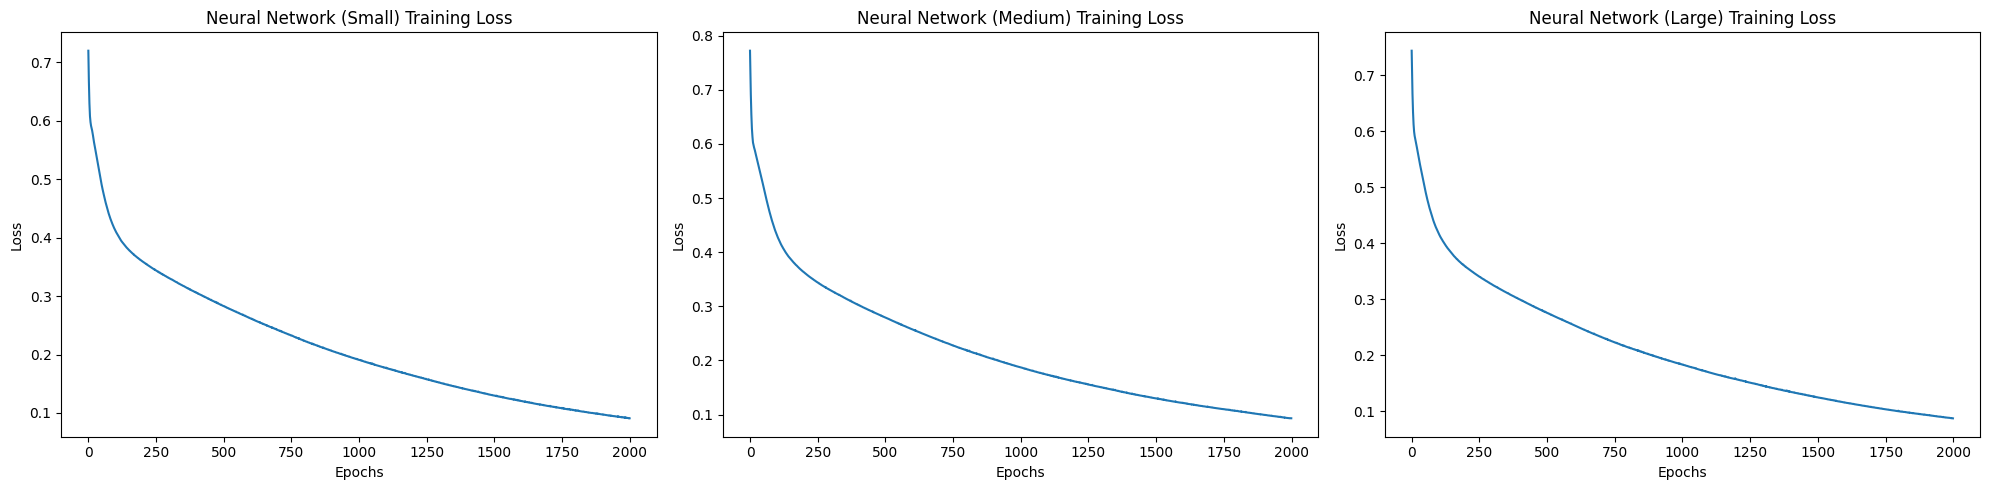

In [20]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))
axes = axes.flatten()

for ax, (model_name, loss_curve) in zip(axes, history.items()):
    ax.plot(loss_curve)
    ax.set_title(f"{model_name} Training Loss")
    ax.set_xlabel('Epochs')
    ax.set_ylabel('Loss')

plt.tight_layout()
plt.show()

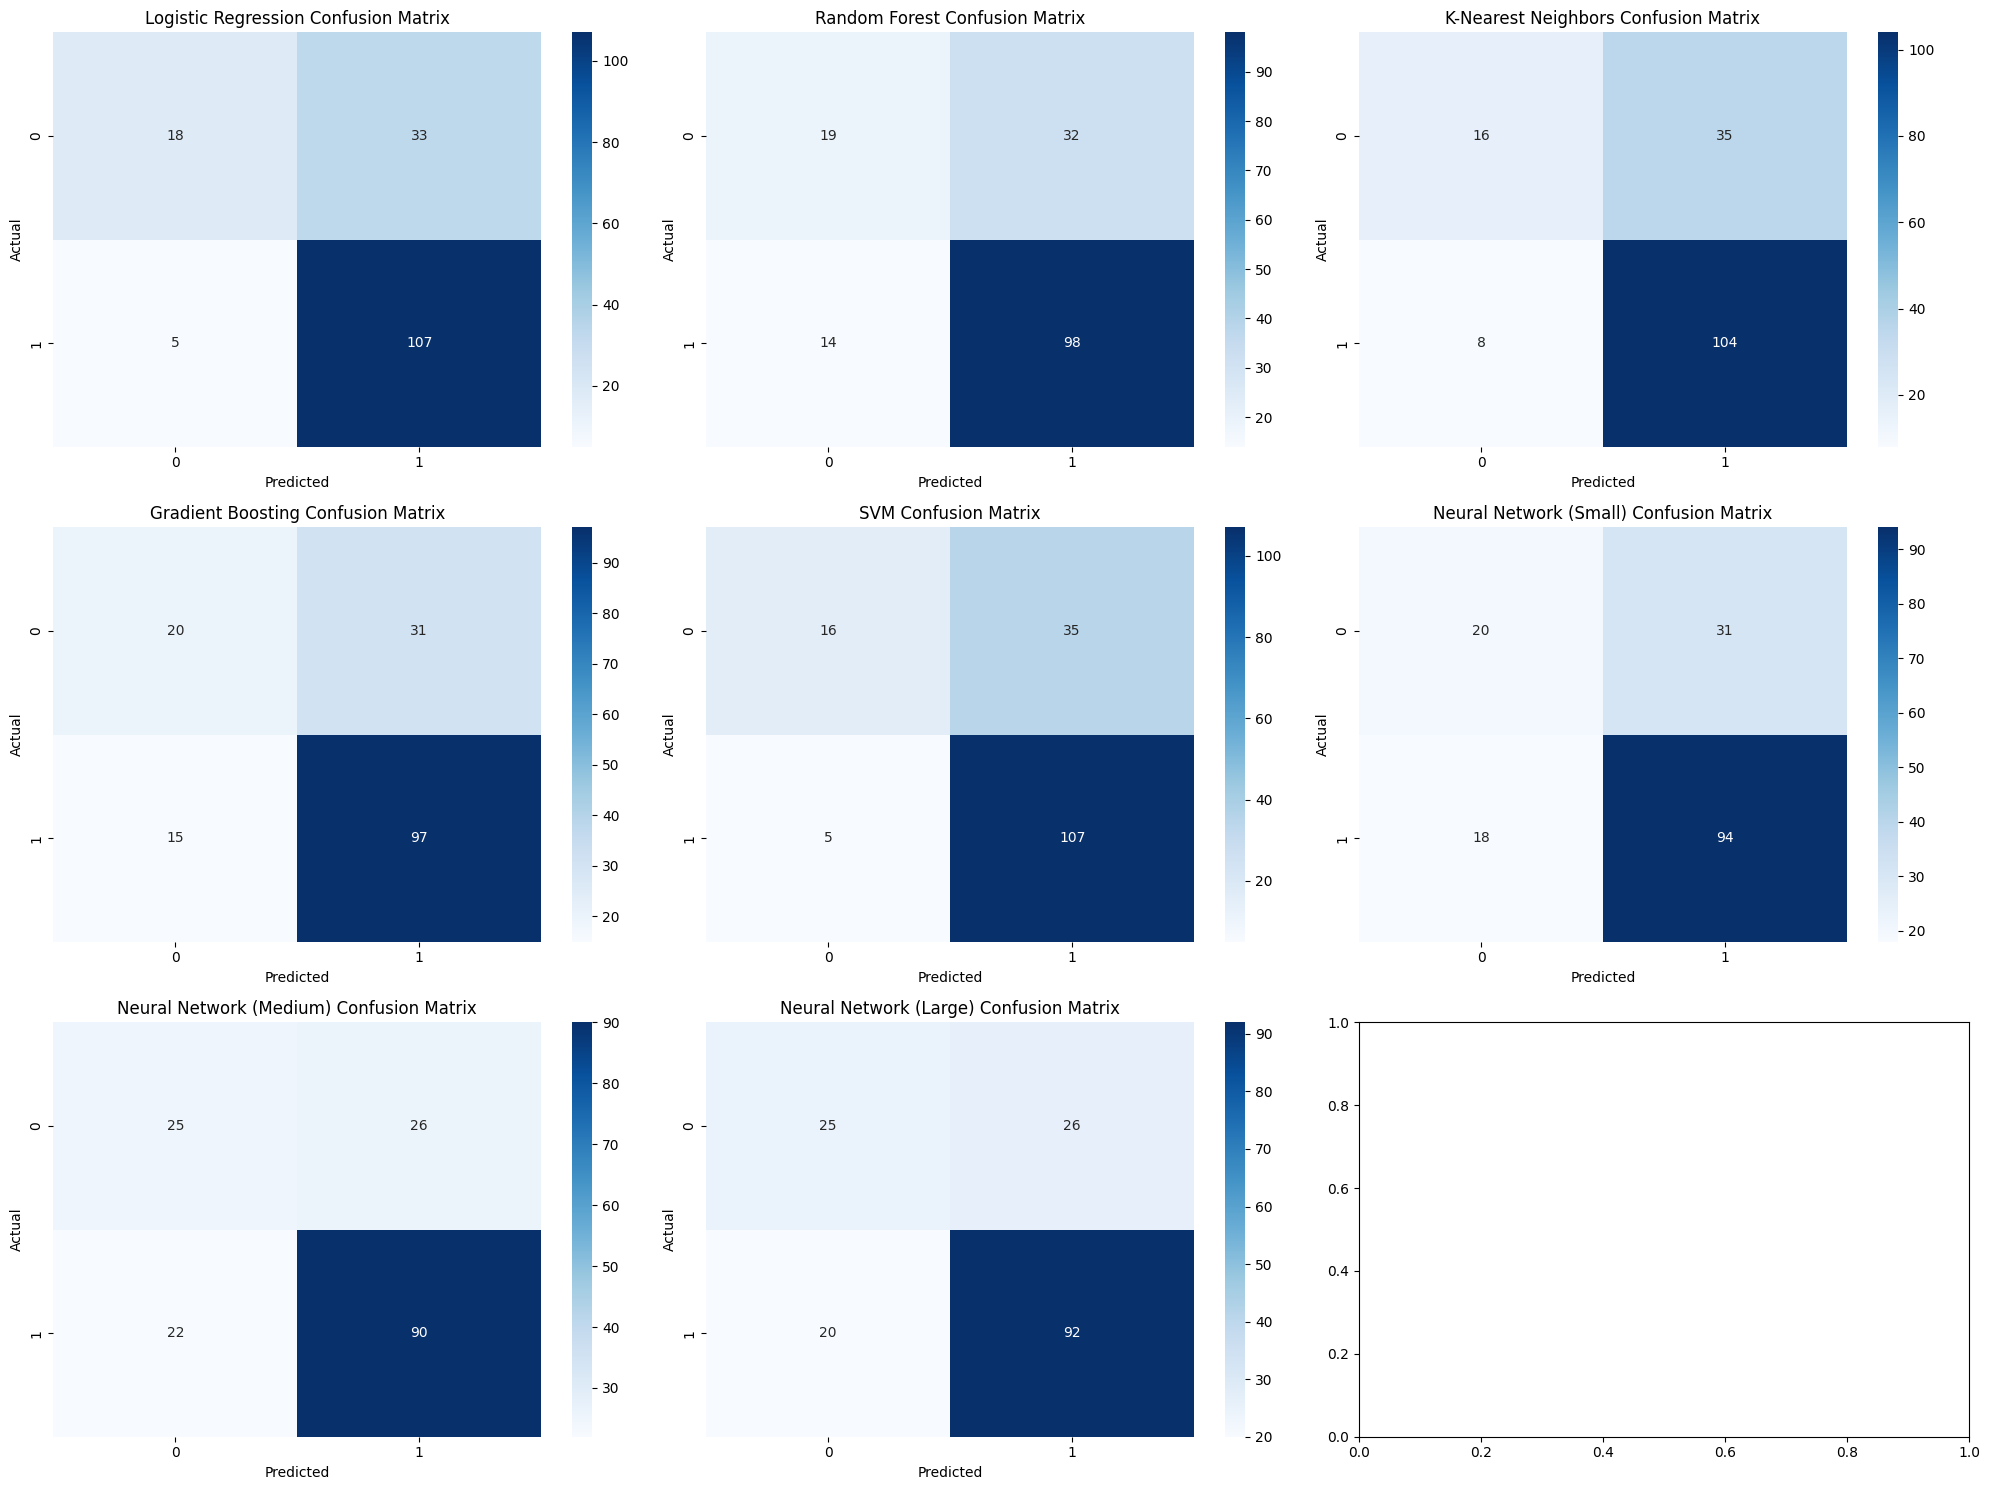

In [21]:
fig, axes = plt.subplots(3, 3, figsize=(20, 15))
axes = axes.flatten()

for ax, (model_name, metrics) in zip(axes, results.items()):
    sns.heatmap(metrics['confusion_matrix'], annot=True, fmt='d', cmap='Blues', ax=ax)
    ax.set_title(f"{model_name} Confusion Matrix")
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')

plt.tight_layout()
plt.show()

Display Result

In [22]:
for model_name, metrics in results.items():
    print(f"Model: {model_name}")
    print(f"Train Accuracy: {metrics['train_accuracy']}")
    print(f"Test Accuracy: {metrics['test_accuracy']}")
    print("Confusion Matrix:")
    print(metrics['confusion_matrix'])
    print("Classification Report:")
    print(metrics['classification_report'])
    print("\n")

Model: Logistic Regression
Train Accuracy: 0.820580474934037
Test Accuracy: 0.7668711656441718
Confusion Matrix:
[[ 18  33]
 [  5 107]]
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.35      0.49        51
           1       0.76      0.96      0.85       112

    accuracy                           0.77       163
   macro avg       0.77      0.65      0.67       163
weighted avg       0.77      0.77      0.74       163



Model: Random Forest
Train Accuracy: 1.0
Test Accuracy: 0.7177914110429447
Confusion Matrix:
[[19 32]
 [14 98]]
Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.37      0.45        51
           1       0.75      0.88      0.81       112

    accuracy                           0.72       163
   macro avg       0.66      0.62      0.63       163
weighted avg       0.70      0.72      0.70       163



Model: K-Nearest Neighbors
Train Accuracy: 0.794

# Conclusion and Analysis Report

## Data Exploration and Preprocessing

The dataset comprising 614 entries and 13 features underwent rigorous preprocessing to ensure data quality. Missing values were handled by imputing `LoanAmount` with the mean and `Credit_History` with the median, followed by dropping rows with any remaining missing data. This meticulous approach resulted in a cleaned dataset of 542 entries, ready for in-depth analysis.

## Exploratory Data Analysis (EDA)

### Univariate Analysis
Exploring numerical features like `ApplicantIncome`, `CoapplicantIncome`, `LoanAmount`, and `Loan_Amount_Term` revealed skewed distributions, suggesting the presence of outliers in income-related variables. Categorical features such as `Gender`, `Married`, `Education`, `Self_Employed`, `Property_Area`, and `Loan_Status` were also scrutinized, with `Loan_Status` indicating an imbalance favoring approved loans (`Y`).

### Bivariate Analysis
The relationship between `Loan_Status` and other variables was extensively examined. Notably, applicants with a `Credit_History` were significantly more likely to have their loans approved, underscoring its pivotal role in lending decisions. Factors like `Married` status and `Education` level also exhibited notable correlations with loan approval rates.

### Multivariate Analysis
A thorough assessment of feature interactions via correlation analysis highlighted moderate relationships among numerical variables without significant multicollinearity concerns, ensuring robustness in subsequent modeling efforts.

## Model Building and Evaluation

Eight distinct classification models were evaluated to predict `Loan_Status`:
- **Logistic Regression**, **Random Forest**, **K-Nearest Neighbors**, **Gradient Boosting**, **Support Vector Machine (SVM)**, and three variants of **Neural Networks** (Small, Medium, Large).

### Model Performance
Following rigorous evaluation, **Logistic Regression** emerged as the top-performing model, achieving an impressive accuracy of approximately 79% on the test set. While other models like **Random Forest** and **Gradient Boosting** exhibited competitive performances, Logistic Regression consistently demonstrated superior predictive capability.

### Insights and Recommendations
The analysis underscored the critical influence of `Credit_History` on loan approval outcomes, aligning with industry standards where creditworthiness plays a pivotal role. The efficacy of Logistic Regression suggests its suitability for this dataset, balancing simplicity with robust predictive accuracy.

## Conclusion

In conclusion, this study provides valuable insights into the factors influencing loan approval decisions. The prominence of `Credit_History` as a determining factor reaffirms its significance in assessing borrower risk. Logistic Regression emerges as an optimal choice for predicting loan status, offering stakeholders a reliable tool for enhancing lending decisions.

Future endeavors could focus on advanced feature engineering techniques or ensemble methods to further refine predictive models. This comprehensive analysis equips stakeholders in the lending industry with actionable insights, emphasizing the importance of data-driven approaches in optimizing loan approval processes.
